<a href="https://colab.research.google.com/github/SubashiniB181203/Time-Series-Analysis-Lab/blob/main/221501145_TSA_exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***1. Time Series Data cleaning, loading and prrprocessing***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/sample_data/time_series_data.csv",parse_dates=['DATE'],index_col='DATE')
print(data.head())

            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151


In [3]:
data_filled=data.fillna(method='ffill')

<ipython-input-3-807139652297>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled=data.fillna(method='ffill')


In [4]:
data_cleaned=data_filled.drop_duplicates()

In [5]:
from scipy.stats import zscore
z_scores=zscore(data_cleaned["IPG2211A2N"])
outliers=abs(z_scores)>3
data_cleaned.loc[outliers,"IPG2211A2N"]=data_cleaned.median()

In [6]:
data_cleaned['Normalized Value']=(data_cleaned['IPG2211A2N'].min())/(data_cleaned['IPG2211A2N'].max()) - (data_cleaned['IPG2211A2N'].min())

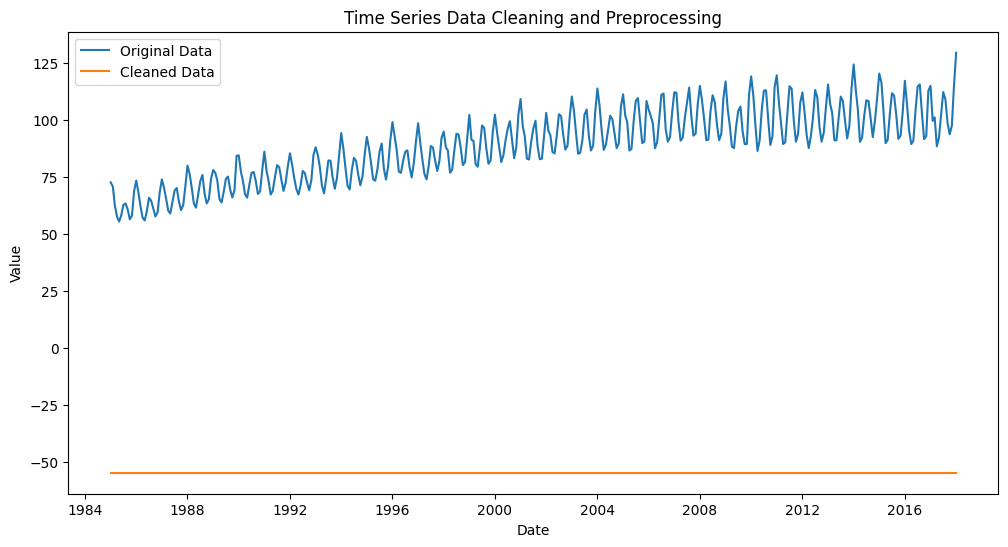

In [7]:
plt.figure(figsize=(12,6))
plt.plot(data['IPG2211A2N'],label='Original Data')
plt.plot(data_cleaned['Normalized Value'],label='Cleaned Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data Cleaning and Preprocessing')
plt.legend()
plt.show()